In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


1. linear regression model to train data for practice 
2. the purpose is to understand different models.
3. finish my kernel then compare to others then summarize then optimize rather than just copy paste.
4. the methodology maybe not correct

In [43]:
import numpy as np
import pandas as pd
from scipy import sparse # The most important part of scipy is sparse providing sparse matrices.
import matplotlib.pyplot as plt
%matplotlib inline  
# Render a figure in the notebook rather than display a object. 
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [3]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
X_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
X_train, y_train = df_train.iloc[:,:-1], df_train.iloc[:,-1]

# Basic Data Exploration of training and test data combined
1. The input variable of train and test data are concatenated
2. The target variable of train data is independent for data exploration

In [5]:
# Inspect columns of training data are consistent with test data 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
X_train.columns == X_test.columns

(1460, 80)
(1459, 80)
(1460,)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# characterizing training data
print("Training data shape: \n{}".format(X_train.shape))
print("\nFeature names: \n{}".format(X_train.columns))
print("\nData type of dependent variable: {}".format(X_train.dtypes))
print("\nData type of target variable: {}".format(y_train.dtype))

Training data shape: 
(1460, 80)

Feature names: 
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageAre

In [7]:
print("First five rows of data: \n", X_train.head())
print ("Summary of training data: \n", X_train.describe())

First five rows of data: 
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0      

In [8]:
# characterizing the test data
print("Test data shape: \n{}".format(X_test.shape))
print("\nFeature names: \n{}".format(X_test.columns))
print("\nData type of dependent variable: {}".format(X_test.dtypes))

Test data shape: 
(1459, 80)

Feature names: 
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 

In [9]:
print("First five rows of test data: \n", X_test.head())
print ("Summary of test data: \n", X_test.describe())

First five rows of test data: 
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  

In [10]:
# There are two types of dependent variables: categorical and numerical
num_features = [i for i in X_train if X_train[i].dtype != "object"]
cate_features = [i for i in X_train if X_train[i].dtype == "object"]
print("There are {0} numeric features and {1} categorical features\n".format(len(num_features), len(cate_features)))
print("The numerica features:", num_features, '\n')
print("The categorical feature:", cate_features)
# Some features' data types are numeric but they may be possible to act as categorical variable.
# We need to explore into that

There are 37 numeric features and 43 categorical features

The numerica features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

The categorical feature: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir

Within numeric features 

# Missing Values
1. Detect missing values
2. Handle missing values

In [11]:
# Target variable
print(f'There are { y_train.isnull().sum()} missing values in the target variable')

There are 0 missing values in the target variable


In [12]:
# concatenate the train and test data
X_global = pd.concat([X_train, X_test], ignore_index=True)
print('Global data shape:', X_global.shape)
print(X_global.tail())

Global data shape: (2919, 80)
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
2914         Lvl    AllPub  ...           0        0    NaN    NaN   
2915         Lvl    AllPub  ...           0        0    NaN    NaN   
2916         Lvl    AllPub  ...           0        0    NaN    NaN   
2917         Lvl    AllPub  ...           0        0    NaN  MnPrv   
2918         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
2914   

<AxesSubplot:>

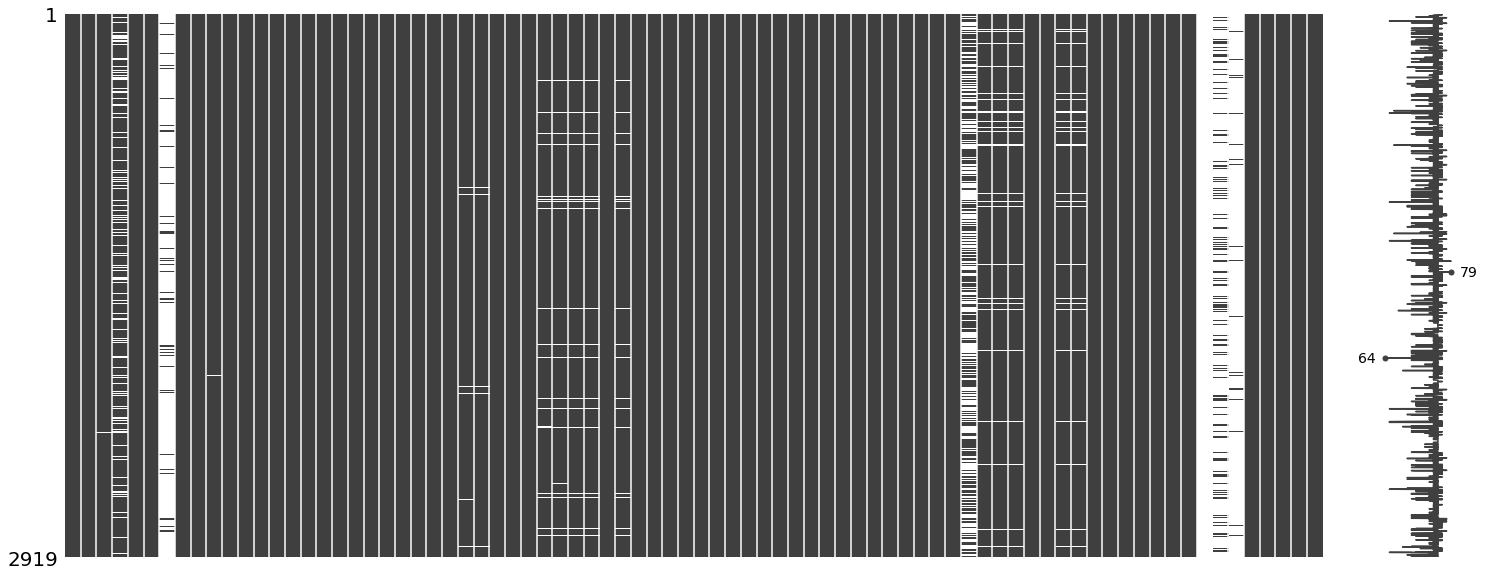

In [13]:
msno.matrix(X_global)

### About missingno heatmap
1. Used to identify if there is a relationship in the presence of null values between each of the columns.
2. Values close to positive 1 or negative 1 indicate that the presence of null values in one column is either correlated or anti-correlated with the presence of null values in another column.
3. Values close to 0 indicate that there is little to no relationship between the presence of null values in one colum compared to another.

<AxesSubplot:>

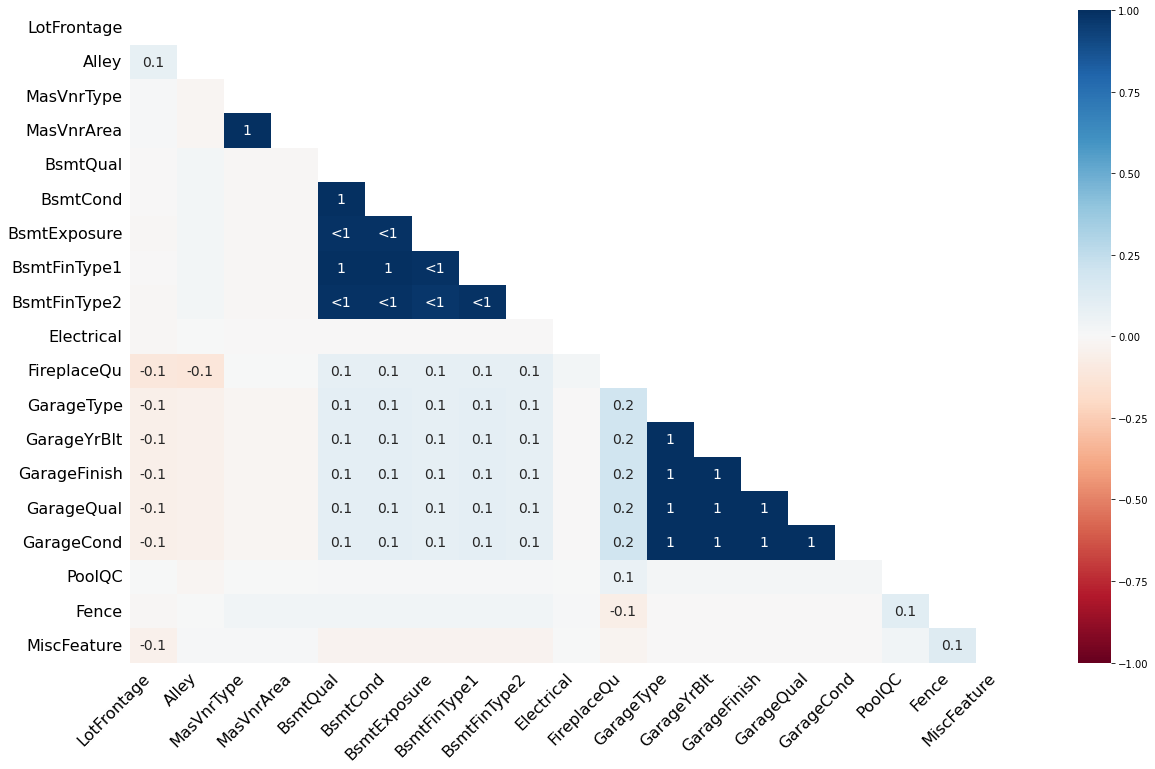

In [14]:
# Using train data to identify the correlation of missing values. 
# Some features indicate 1 or close to 1 correlation. These features have similar syntax meanings 
# MasVnrType and MasVnrType, Bsmt feature group, Garage feature group.
msno.heatmap(X_train)


Text(0.5, 1.0, 'Features by percentage of missing values')

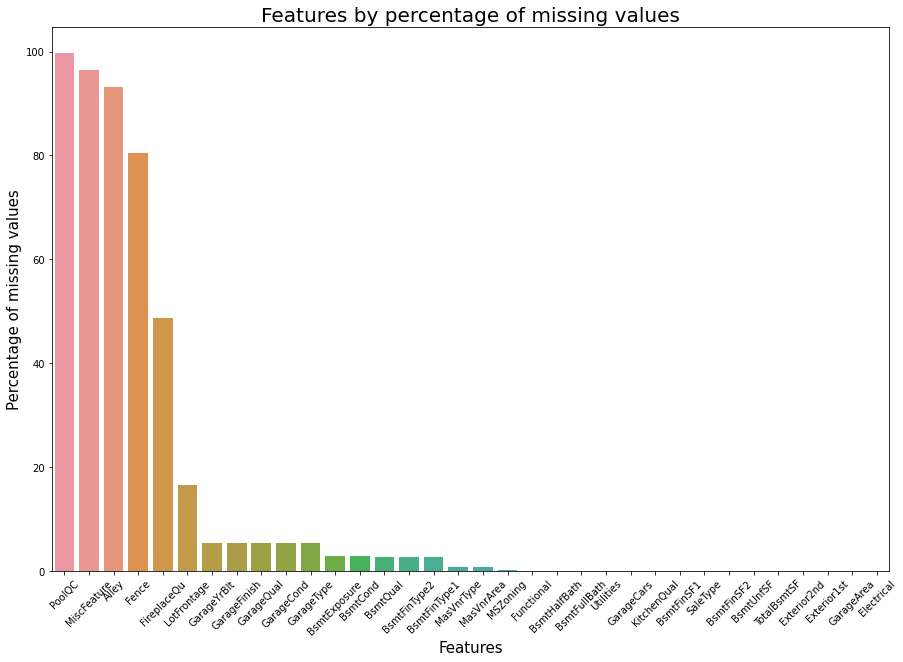

In [15]:
# Detect which features have missing values
withNull = X_global.isnull().sum().sort_values(ascending=False)/len(X_global) * 100
null_features = withNull[withNull!=0]
# Plot features with missing values
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=null_features.index, y=null_features.values)
plt.xticks(rotation=45)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Features by percentage of missing values', fontsize=20)

In [16]:
withNull

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
FireplaceQu      48.646797
                   ...    
CentralAir        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
SaleCondition     0.000000
Length: 80, dtype: float64

In [17]:
# Removing the features of PoolQC, MiscFeature, Alley, Fence as they miss over 80% values 
# Update the training data
to_remove =  withNull.index[0:4]
X_global.drop(columns=to_remove, inplace=True)

In [18]:
# Inspect the rest null features one by one
# FireplaceQu missing values is due to some houses do not have fireplace
# fill null value with NF as no fireplace
X_global['FireplaceQu'].value_counts()
X_global['FireplaceQu'] = X_global['FireplaceQu'].fillna("NF")

In [19]:
# LotFrontage: Linear feet of street connected to property
# LotFrontage is indenpent from other features from nullity correlation matrix
# Fill the column with median value
# Missing values filling missing values with global median values can lead to data leakage
# Even the leaking effect is slight it is worthy to specify that. 
X_global['LotFrontage'].describe()
X_global['LotFrontage'] = X_global['LotFrontage'].fillna(X_global['LotFrontage'].median())


In [20]:
# Garage feature group
# The garage feature group as GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual
# These five features have the same percentage of missing valuse due to some houses have no garage
# Fill these columns with NG as no garage.
# Notice that GarageYrBlt (temporarily fill with NG)
garage_features = ["GarageYrBlt", "GarageCond", "GarageType", "GarageFinish", "GarageQual"]
X_global[garage_features] = X_global[garage_features].fillna('NG')

In [21]:
# Basement feature group
# Similar to garage feature group
# The missing value mostly due to there is no basement
# Fill missing values with NB as no basement
basement_features = ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
X_global[basement_features] = X_global[basement_features].fillna('NB')

In [22]:
# Masonry feature group
# MasVnrType and MasVnrArea have the same percentage of missing values
# Due to some houses have no masonry
# Fill missing values with NM as no masonry
masonry_features = ["MasVnrType", "MasVnrArea"]
X_global[masonry_features] = X_global[masonry_features].fillna('NM')

In [23]:
# Electrical feature has only one missing values
# Fill the missing with mostly present values
electrical_most = X_global['Electrical'].value_counts(ascending=False).index[0]
X_global['Electrical'] = X_global['Electrical'].fillna(electrical_most)

In [24]:
# MSZoning feature has missing only in test set
# Fill the missing with mostly present values
MSZoning_most = X_global['MSZoning'].value_counts(ascending=False).index[0]
X_global['MSZoning'] = X_global['MSZoning'].fillna(MSZoning_most)

In [25]:
# BsmtHalfBath and BsmtFullBath features
# Fill the missing with mostly present values
BsmtHalfBath_most = X_global['BsmtHalfBath'].value_counts(ascending=False).index[0]
X_global['BsmtHalfBath'] = X_global['BsmtHalfBath'].fillna(BsmtHalfBath_most)

BsmtFullBath_most = X_global['BsmtFullBath'].value_counts(ascending=False).index[0]
X_global['BsmtFullBath'] = X_global['BsmtFullBath'].fillna(BsmtFullBath_most)

In [26]:
# Funtional feature
Functional_most = X_global['Functional'].value_counts(ascending=False).index[0]
X_global['Functional'] = X_global['Functional'].fillna(Functional_most)

In [27]:
# Utilites feature
Utilities_most = X_global['Utilities'].value_counts(ascending=False).index[0]
X_global['Utilities'] = X_global['Utilities'].fillna(Utilities_most)

In [28]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageCars, GarageArea
# use for loop to all the missing feature

for feature in ['Exterior1st', 'Exterior2nd','KitchenQual', 'SaleType']:
    feature_most = X_global[feature].value_counts(ascending=False).index[0]
    X_global[feature] = X_global[feature].fillna(feature_most)

for feature in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']:
    feature_median = X_global[feature].median()
    X_global[feature] = X_global[feature].fillna(feature_median)



In [29]:
# Re-check the missing values
print(f"After handling the missing value, there are {X_global.isnull().sum().sum(axis=0)} missing in the training data.")

After handling the missing value, there are 0 missing in the training data.


# Data Exploration after Processing Missing Data

### Distribution of Target Variable

In [30]:
y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

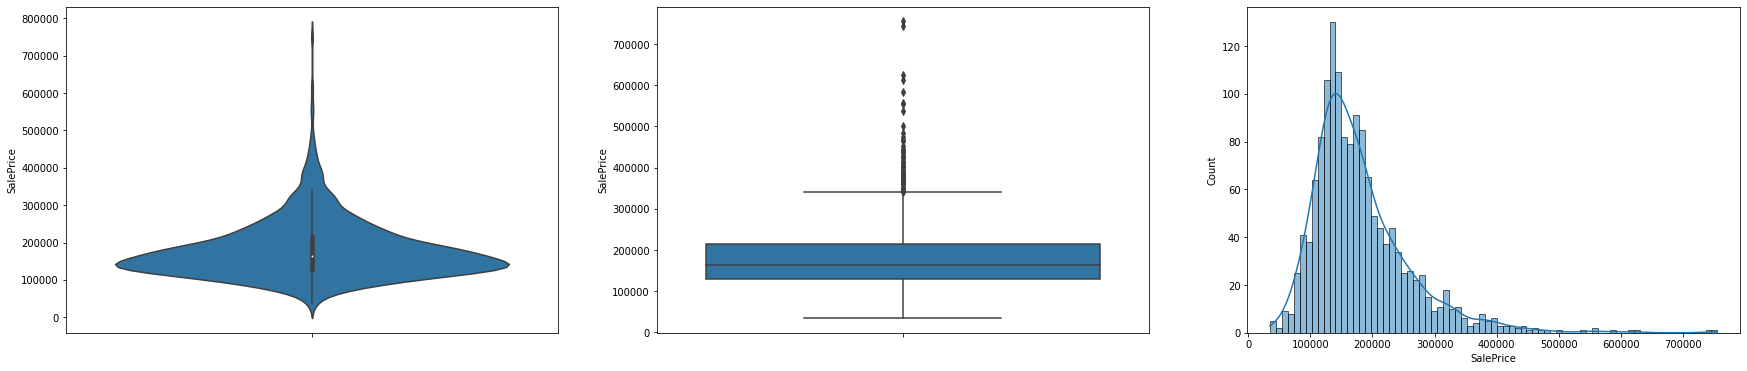

In [31]:
# Voilin, box and histgram
fig, ax = plt.subplots(1,3,figsize=[30,6])
sns.violinplot(y=y_train, ax=ax[0])
sns.boxplot(y=y_train, ax=ax[1])
sns.histplot(data=y_train, bins=75, kde=True, ax=ax[2])
plt.show()

### About Skewness
1. The target variable is not normal distributed and positively skewed
2. Positive skewness means the target variable has higher proportion of low house price. The trained model on this data will perform better at predicting low house price. 
3. skewness is the meansure of the asymmetry of an ideally symmetric probability distribution.
4. tail on the right side --> positive skewness
5. tail on the left side --> negative skewness
6. We take several method to handle skewness of the target variable. log-transformation, square root transform, box-cox transform

In [32]:
stats.skew(y_train)

1.880940746034036

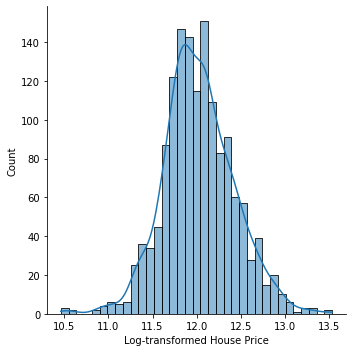

In [33]:
# log transformation
y_train_log = np.log(y_train)
# plot the transformed target variable
sns.displot(y_train_log, kde=True)
plt.xlabel('Log-transformed House Price')
plt.show()

In [34]:
# Log transformation can decrease skewness and make target variable close to normal distribution
print(f'Before transformation the skewness is {stats.skew(y_train)}, after transformation it is {stats.skew(y_train_log)}.')
print('\nAfter log transformation the summary of target variable\n\n', y_train_log.describe()) 

Before transformation the skewness is 1.880940746034036, after transformation it is 0.1212103673013655.

After log transformation the summary of target variable

 count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


### About Box-Cox transformation
The Box-Cox transforms the data so it closely resembles a normal distribution
Why Box-Cox transformation? Generally we assume the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis test. Data transformation can normalize the error and improve the predictive power by cleaning some noise.   

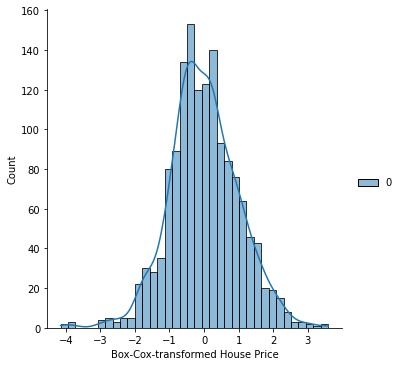

In [52]:
# Box-Cox transformation
y_train_boxcox = power_transform(np.asarray(y_train).reshape(-1,1), method='box-cox')
# plot of transformed data
sns.displot(y_train_boxcox, kde=True)
plt.xlabel('Box-Cox-transformed House Price')
plt.show()

In [55]:
# Box-Cox transformation can decrease skewness and make target variable close to normal distribution
print(f'Before transformation the skewness is {stats.skew(y_train)}, after transformation it is {stats.skew(y_train_boxcox)}.')
print('\nAfter log transformation the summary of target variable\n\n', pd.DataFrame(y_train_boxcox).describe()) 

Before transformation the skewness is 1.880940746034036, after transformation it is [-0.008644].

After log transformation the summary of target variable

                   0
count  1.460000e+03
mean   1.592334e-15
std    1.000343e+00
min   -4.150039e+00
25%   -6.146886e-01
50%   -4.120367e-02
75%    6.352416e-01
max    3.589750e+00


In [48]:
y_train_boxcox

array([[ 0.57115401],
       [ 0.22762686],
       [ 0.74186843],
       ...,
       [ 1.17020201],
       [-0.3871362 ],
       [-0.29307224]])

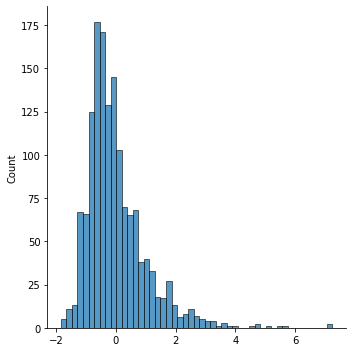

In [35]:
# Standardization of y_train
y_train_standardize = scale(y_train)
# plot
sns.displot(y_train_standardize)

In [36]:
stats.skew(y_train_standardize)

1.880940746034036

In [37]:
scaler = StandardScaler()
y_train_standard = scaler.fit_transform(np.array(y_train).reshape(-1,1))

In [38]:
y_train_standard

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [39]:
y_train_standardize

array([ 0.34727322,  0.00728832,  0.53615372, ...,  1.07761115,
       -0.48852299, -0.42084081])

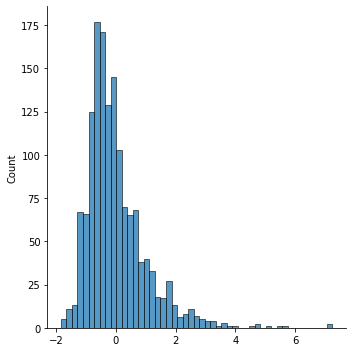

In [40]:
sns.displot(y_train_standardize)

In [41]:
np.log()

ValueError: invalid number of arguments

# Feature Engineering
before engineering the features, we need to recheck the numerical features as some numerical feature can act similar to categorcial variables.
deal with the datetime 

In [ ]:
# update categorical and numeric features
num_features = [i for i in X_train if X_train[i].dtype != "object"]
cate_features = [i for i in X_train if X_train[i].dtype == "object"]
print("There are {0} numeric features and {1} categorical features\n".format(len(num_features), len(cate_features)))
print("The numeric features:", num_features, '\n')
print("The categorical feature:", cate_features)

In [ ]:
# Numeric features but act as categorical 
# astype(str) "MSSubClass", 
# datetime
# 'YearBuilt', 'YearRemodAdd' 'GarageYrBlt', 'MoSold', 'YrSold'

### Encoding Categorical Variables
1. it is necessary to concatenate training and test datasets.
2. handle it later.

In [ ]:
# try how to get dummy variables
pd.get_dummies(df_train[['MSSubClass','LotShape']][:10])

### Binning Features
detect which continuous numeric features have the greatest volatility.

In [ ]:
# Take LotFrontage feature as an example to have a trial of binning feature
df_train['LotFrontage'].plot()
df_train['LotFrontage'].describe()

In [ ]:
bins = np.linspace(20, 320, 16)
print(f"bins: {bins}")
which_bin = np.digitize(df_train[['LotFrontage']], bins=bins)
print("Bin name for data point:\n", which_bin[:10])
print(len(which_bin))
bin_encoder = OneHotEncoder(sparse=False)
bin_encoder.fit(which_bin)
print(bin_encoder.get_feature_names())
print(bin_encoder.categories_)
LotFrontage_binned = bin_encoder.transform(which_bin)
print(LotFrontage_binned[:5])

In [ ]:
reg = LinearRegression().fit(df_train[['LotFrontage']], y_train)
reg_binned = LinearRegression().fit(LotFrontage_binned, y_train)
print(reg.score(df_train[['LotFrontage']], y_train))
print(reg_binned.score(LotFrontage_binned, y_train))

In [ ]:
plt.scatter(df_train[['LotFrontage']], y_train)
plt.scatter(df_train[['LotFrontage']], reg.predict(df_train[['LotFrontage']]))
plt.show()

In [ ]:
# Interactions
LotFrontage_combined = np.hstack([df_train[['LotFrontage']], LotFrontage_binned])
print(LotFrontage_combined.shape)
reg_combined = LinearRegression().fit(LotFrontage_combined, y_train)
print(reg_combined.score(LotFrontage_combined, y_train))

In [ ]:
LotFrontage_combined[:5]

In [ ]:
line = np.linspace(20, 200, 1000, endpoint=False).reshape(-1, 1)
line_binned = bin_encoder.transform(np.digitize(line, bins=bins))
print(line_binned[:5])

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg_combined.predict(line_combined))

In [ ]:
LotFrontage_product = np.hstack([LotFrontage_binned, np.array(df_train[['LotFrontage']]) * LotFrontage_binned])
print(LotFrontage_product.shape)

line_product = np.hstack([line_binned, line * line_binned])
print(line_product.shape)

In [ ]:
reg_product = LinearRegression().fit(LotFrontage_product, y_train)
plt.plot(line, reg_product.predict(line_product))
print(reg_product.score(LotFrontage_product, y_train))

In [ ]:
# Another way to expand continuous feature is to use polynomials of original features.
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(df_train[['LotFrontage']])
LotFrontage_poly = poly.transform(df_train[['LotFrontage']])
print(f"LotFrontage_poly.shape: {LotFrontage_poly.shape}")

In [ ]:
line_poly = poly.transform(line)
print(line_poly)

In [ ]:
# fit polynomial feature to linear regression model.
reg_poly = LinearRegression().fit(LotFrontage_poly, y_train)
print(reg_poly.score(LotFrontage_poly, y_train))

plt.plot(line, reg_poly.predict(line_poly), c='k')
plt.plot(df_train[['LotFrontage']], y_train, 'o')


In [ ]:
# As a comparison, use SVM model to learn on the original data
# plt.plot(df_train[['LotFrontage']], y_train, '.', alpha=0.5)
for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(df_train[['LotFrontage']], y_train)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')


In [ ]:
# Reset input and target variables as numpy array. 
Lotfrontage_init = np.asarray(df_train['LotFrontage'])
y_train = np.asarray(y_train)
print(Lotfrontage_init.shape)
print(y_train.shape)

In [ ]:
np.where(Lotfrontage_init==313)

In [ ]:
# remove outliers in the Lotfrontage and corresponding data in target variable.
del_pos = np.where(Lotfrontage_init==313)
Lotfrontage = np.delete(Lotfrontage_init ,del_pos)
y_train_rm = np.delete(y_train, del_pos)

In [ ]:
# Univariate nonlinear transformation
plt.hist(Lotfrontage)
plt.show()
plt.hist(y_train_rm)
plt.show

In [ ]:
# Log transformation. 
Lotfrontage_log = np.log(Lotfrontage + 1).reshape(-1,1)
y_train_log = np.log(y_train_rm + 1).reshape(-1,1)
plt.hist(Lotfrontage_log)
plt.show()
plt.hist(y_train_log)
plt.show()

In [ ]:
reg_log = LinearRegression().fit(Lotfrontage_log, y_train_log)
print(reg_log.score(Lotfrontage_log, y_train_log))
plt.scatter(x=Lotfrontage_log, y=y_train_log)
plt.show()

### Outliers

### Feature Scaling
1. data normalization
2. data tranformation
3. data standardization

### Feature selection


#### Univariate Statistics

In [ ]:
# imported modules
# from sklearn.feature_selection import SelectPercentile
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import f_regression

In [ ]:
X_train.head()

In [ ]:
X_train_encoded = pd.get_dummies(X_train)

In [ ]:
X_train_encoded.isnull().sum()

In [ ]:
select = SelectPercentile(f_regression, percentile=50)
select.fit(X_train_encoded, y_train)
X_train_selected = select.transform(X_train_encoded)

In [ ]:
print(select.n_features_in_)
print(X_train_encoded.columns[select.get_support()])

In [ ]:
lrmodel_selection=LinearRegression()
lrmodel_selection.fit(X_train_selected, y_train)
print(lrmodel_selection.score(X_train_selected, y_train))
# removing the noise features improved performance

#### Model-Based feature selection

In [ ]:
# import modules
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
mb_selection = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
mb_selection.fit(X_train_encoded, y_train)

In [ ]:
X_train_mb_selected = mb_selection.transform(X_train_encoded)
print(X_train_mb_selected.shape)

In [ ]:
lrmodel_mbSelection = LinearRegression()
lrmodel_mbSelection.fit(X_train_encoded, y_train)
print(lrmodel_mbSelection.score(X_train_encoded, y_train))

#### Iterative selection

In [ ]:
# import modules
# from sklearn.feature_selection import RFE
# take around 50 miniutes to run
# computationally intensive
# select_RFE = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
# select_RFE.fit(X_train_encoded, y_train)

In [ ]:
# X_train_RFE = select_RFE.transform(X_train_encoded)
# lrmodel_RFE = LinearRegression().fit(X_train_RFE, y_train)
# lrmodel_RFE.score(X_train_RFE, y_train)

### Cross-Validation

In [ ]:
# using LotFrontage and target variable y_train_rm as example
Lotfrontage = Lotfrontage.reshape(-1,1)
y_train_rm = y_train_rm.reshape(-1,1)

print(Lotfrontage.shape)
print(y_train_rm.shape)

In [ ]:
# cross validation
lr_model = LinearRegression()
scores = cross_val_score(lr_model, Lotfrontage, y_train_rm)
print(scores, scores.mean())

In [ ]:
# K fold setting
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
lr_model = LinearRegression()
scores = cross_val_score(lr_model, Lotfrontage, y_train_rm, cv=k_fold)
print(scores)

In [ ]:
# Leave-one-out
loo = LeaveOneOut()
lr_model = LinearRegression()
scores_loo = cross_val_score(lr_model, Lotfrontage, y_train_rm, cv=loo)


In [ ]:
# shuffle-split cross-validation
from sklearn.model_selection import ShuffleSplit

In [ ]:
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10, random_state=0)
lr_model = LinearRegression()
scores_ss = cross_val_score(lr_model, Lotfrontage, y_train_rm, cv=shuffle_split)
print(scores_ss)

In [ ]:
# cross validation with group
from sklearn.model_selection import GroupKFold

In [ ]:
groups = [1]*486 + [2]*486 + [3]*486
lr_model = LinearRegression()
scores_group = cross_val_score(lr_model, Lotfrontage, y_train_rm, groups, cv=GroupKFold(n_splits=3))
print(scores_group)

### Grid Search

In [ ]:
# split data into train+validation and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(Lotfrontage, y_train_rm, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)


In [ ]:
# A basic grid search for support vector
scores = []  # dictionary is more appropriate
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svr = SVR(kernel='linear', gamma=gamma, C=C)
        svr.fit(X_train, np.ravel(y_train))  # 2d numpy array or 1d numpy array? 
        scores.append(svr.score(X_valid, np.ravel(y_valid)))

In [ ]:
plt.plot(scores)

In [ ]:
# Grid search with cross-validation
scores = []
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svr = SVR(kernel='linear', gamma=gamma, C=C)
        score_each = cross_val_score(svr, X_trainval, np.ravel(y_trainval), cv=5)
        scores.append(score_each)
# average all scores
print(np.ravel(scores).mean())

In [ ]:
plt.plot(scores)

#### Using GridSearchCV of scikit-learn

In [ ]:
# The module input
# from sklearn.model_selection import GridSearchCV
# Set parameters combination as dictionary
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(Lotfrontage, np.ravel(y_train_rm), random_state=0)
grid_search.fit(X_train, y_train)



In [ ]:
print(f'Test set score: {grid_search.score(X_test, y_test)}')
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')
# the score method employs a model trained on the whole training set
# The best_score_ attribute stores the mean cross_validation accuracy.
print(f'Best estimator: \n{grid_search.best_estimator_}')

In [ ]:
results_gs = pd.DataFrame(grid_search.cv_results_)
score_meantest = np.asarray(results_gs.mean_test_score).reshape(-1,6)
sns.heatmap(score_meantest, cmap="YlGnBu", annot=True,
            xticklabels=param_grid['gamma'],
            yticklabels=param_grid['C'])
plt.xlabel('gamma')
plt.ylabel('C')
plt.show()


In [ ]:
# Some plots to show the result is less ideal because the search ranges were not chosen properly
# The data is not fit to this scenario as my data is suitable for the support vector 
# The code itself is intersting so I still try to employ to my data
fig, axes = plt.subplots(1,3, figsize=(30,5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                    'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                   'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(-1,6)
    scores_image = sns.heatmap(scores, cmap="YlGnBu", annot=True,
                               xticklabels=param_grid['gamma'],
                               yticklabels=param_grid['C'], ax=ax)

    


#### Nested Cross-Validation

In [ ]:
# object oriented programming
def nested_cv(X, y, inner_cv, outer_cv, classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    for training_samples, test_samples in outer_cv.split(X, y):
        # find the best parameter using inner cross-validation
        best_parameter = {}
        best_score = -np.inf
        # iterate over parameters
        for parameter in parameter_grid:
            # accumulate score over inner splits
            cv_scores =[]
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = classifier(**parameter)
                clf.fit(X[inner_train], y[inner_train])
                # evalueate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remembre parameters
                best_score = mean_score
                best_params = parameter
        clf = classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)
                
    

#### Model Evaluation

In [ ]:
sns.heatmap(df_train.corr())

In [ ]:
# take the GrLivArea feature pairing with saleprice as example as it is more related to the target variable
living_area= np.array(df_train['GrLivArea']).reshape(-1,1)
saleprice = np.array(df_train['SalePrice']).reshape(-1,1)

In [ ]:
print(df_train['GrLivArea'].describe())
plt.boxplot(living_area)
plt.show()
plt.hist(living_area)
plt.show()

In [ ]:
svr=SVR()

In [ ]:
svr.fit(living_area, saleprice)

In [ ]:
svr.score(living_area, saleprice)

In [ ]:
df_train.columns
df_train.corr()['SalePrice'].sort_values(ascending=False)

In [ ]:

y_train = df_train["SalePrice"]
X_train = df_train.drop(columns='SalePrice')

seperate different feather into numeric and categorical

In [ ]:
print("There are three types of feature", X_train.dtypes.value_counts().index)
num_fea = [i for i in X_train if X_train[i].dtype!="object"] 
cate_fea =[i for i in X_train if X_train[i].dtype=="object"]

In [ ]:
X_train_num = X_train[num_fea]
X_train_num.fillna(value=0, inplace=True)

In [ ]:
X_train_num.isnull().sum()

In [ ]:
# linear regression model
model = LinearRegression()
model.fit(X_train_num, y_train)

In [ ]:
# get model score
r_sq = model.score(X_train_num, y_train)
print('coefficient of determination:', r_sq) # what is coefficient of determination
print('intercept:', model.intercept_)
print('slope:', model.coef_)

In [ ]:
X_test = df_test[num_fea]
X_test.fillna(value=0, inplace=True)

In [ ]:
model.predict(X_test)

# Ridge Regression

In [ ]:
model_ridge = Ridge()
model.fit(X_train_num, y_train)
model_ridge_score = model.score(X_train_num, y_train)

In [ ]:
print(model_ridge_score)

# Lasso Regression

In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train_num, y_train)
model_lasso_score = model.score(X_train_num, y_train)

In [ ]:
print(model_lasso_score)

# ElasticNet Regression

In [ ]:
model_elastic = ElasticNet()
model_elastic.fit(X_train_num, y_train)

In [ ]:
model_elastic_score = model_elastic.score(X_train_num, y_train)
print(model_elastic_score)

# Polynomial Regression

In [ ]:
model_poly = LinearRegression()
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_num)
poly.fit(X_train_poly, y_train)
model_poly.fit(X_train_poly, y_train)

In [ ]:
# This code doesn't work
# model_poly_score = model.score(X_train_poly, y_train)
# print(model_poly_score)

# KNN regressor

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=9)
model_knn.fit(X_train_num, y_train)

In [ ]:
model_knn_score = model_knn.score(X_train_num, y_train)
print(model_knn_score)

# Support Vector Machine

In [ ]:
model_SVR = SVR()
model_SVR.fit(X_train_num, y_train)

In [ ]:
model_SVR_score = model_SVR.score(X_train_num, y_train)
print(model_SVR_score)

# Decison Tree

In [ ]:
model_DTR = DecisionTreeRegressor(random_state=0)
model_DTR.fit(X_train_num, y_train)

In [ ]:
model_DTR_score = model_DTR.score(X_train_num, y_train)
print(model_DTR_score)

# K-means Clustering

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train_num)

In [ ]:
print(kmeans.labels_)

# Hierarchical Clustering

In [ ]:
Hierarch_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(X_train_num)

In [ ]:
print(Hierarch_clustering.labels_)

# Primary Component Analysis

In [ ]:
pca_model = PCA(n_components=2)
X_train_PCA = pca_model.fit_transform(X_train_num)


In [ ]:
print(X_train_PCA)